# 세상에서 가장 쉬운 OCR

## 패키지 설치

https://github.com/JaidedAI/EasyOCR

```pip install easyocr```

In [1]:
import easyocr

reader = easyocr.Reader(['ko', 'en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## Load a image

Image reference:

- https://m.mt.co.kr/renew/view.html?no=2010021810110434583
- https://www.joongang.co.kr/article/21793345
- https://blog.daum.net/sarnia/16105218
- https://www.top-rider.com/news/articleView.html?idxno=26900

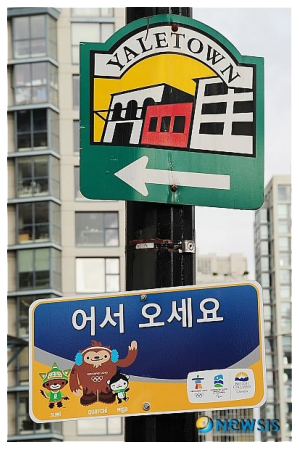

In [2]:
import cv2
import matplotlib.pyplot as plt

img_path = '어서오세요.jpg'
img = cv2.imread(img_path)

plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

## OCR

In [3]:
result = reader.readtext(img_path)

result

[([[133, 26], [307, 26], [307, 91], [133, 91]], '~Ero)', 0.019058505395989776),
 ([[78, 388], [309, 388], [309, 463], [78, 463]],
  '어서 오세요',
  0.7559443464506544),
 ([[110, 554], [138, 554], [138, 562], [110, 562]],
  'UaTul',
  0.176504911475636),
 ([[263, 563], [379, 563], [379, 589], [263, 589]],
  '그 2is1s',
  0.23429591439027203)]

## Result

어서 오세요


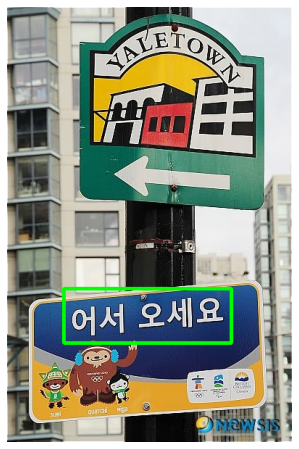

In [4]:
THRESHOLD = 0.5

for bbox, text, conf in result:
    if conf > THRESHOLD:
        print(text)
        cv2.rectangle(img, pt1=bbox[0], pt2=bbox[2], color=(0, 255, 0), thickness=3)

plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

## Functionalize

In [38]:
import easyocr
import cv2
import matplotlib.pyplot as plt

THRESHOLD = 0.5

reader = easyocr.Reader(['ko', 'en'])

def read(img_path):
    img = cv2.imread(img_path)

    result = reader.readtext(img_path)

    r = []

    for bbox, text, conf in result:
        if conf > THRESHOLD:
            r.append(text)
            cv2.rectangle(img, pt1=(int(bbox[0][0]), int(bbox[0][1])), pt2=(int(bbox[2][0]), int(bbox[2][1])), color=(0, 255, 0), thickness=3)

    print(r)
    plt.figure(figsize=(8, 8))
    plt.imshow(img[:, :, ::-1])
    plt.axis('off')
    plt.show()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['아래한글', '한글문서', '디 자 인', '한글과컴퓨터   한글(아래한글) 음', '사용하여', '대한민국정부']


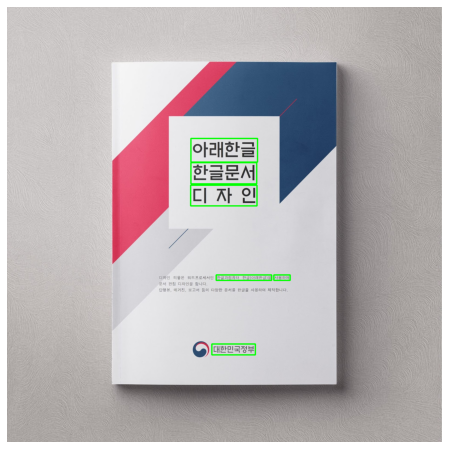

In [39]:
read('book.jpg')

['You Are Here', 'Estas aqui', '너 여기있다', '11-13 minute', 'walk']


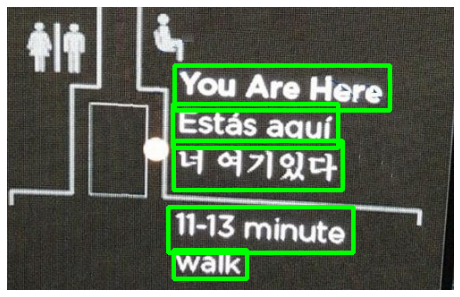

In [11]:
read('youarehere.jpg')

['152가3108', '52각 3108', "'152가 3108", '674 8016', '3108', '52단', '3018', '152가']


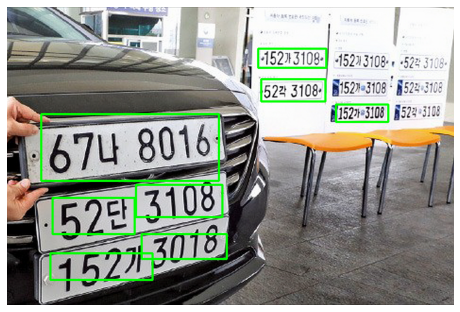

In [40]:
read('licence_plates.jpg')

['Canadian, USA Passports', 'or Permanent Residents', 'canadien ou americain ou', 'residents permanents', '키나다인 미국 여권 소지자', '또는 영주권자']


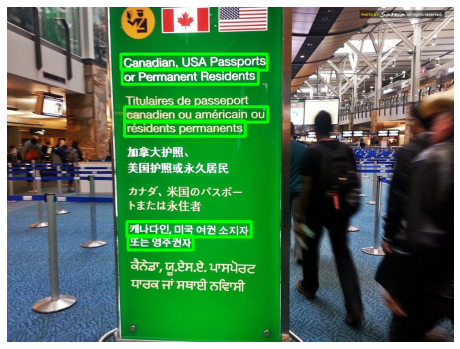

In [12]:
read('airport.jpg')

## Documentation

https://www.jaided.ai/easyocr/

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['カナダ、米国のパスポー', 'トまたは永住者']


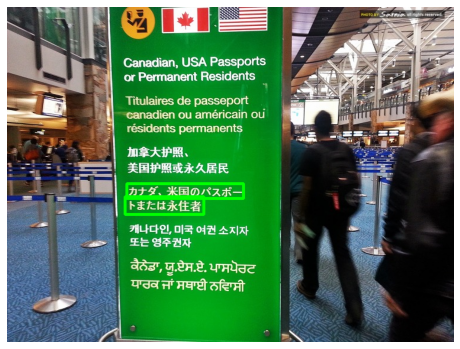

In [29]:
reader = easyocr.Reader(['ja'])

read('airport.jpg')